In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
df_train = pd.read_csv('train.csv')
df_train

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8405,107.39,ak,s,as,c,d,aa,d,q,...,1,0,0,0,0,0,0,0,0,0
4205,8406,108.77,j,o,t,d,d,aa,h,h,...,0,1,0,0,0,0,0,0,0,0
4206,8412,109.22,ak,v,r,a,d,aa,g,e,...,0,0,1,0,0,0,0,0,0,0
4207,8415,87.48,al,r,e,f,d,aa,l,u,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df_train.shape

(4209, 378)

In [5]:
df_train['X0'].unique()

array(['k', 'az', 't', 'al', 'o', 'w', 'j', 'h', 's', 'n', 'ay', 'f', 'x',
       'y', 'aj', 'ak', 'am', 'z', 'q', 'at', 'ap', 'v', 'af', 'a', 'e',
       'ai', 'd', 'aq', 'c', 'aa', 'ba', 'as', 'i', 'r', 'b', 'ax', 'bc',
       'u', 'ad', 'au', 'm', 'l', 'aw', 'ao', 'ac', 'g', 'ab'],
      dtype=object)

In [6]:
df_train['X1'].unique()

array(['v', 't', 'w', 'b', 'r', 'l', 's', 'aa', 'c', 'a', 'e', 'h', 'z',
       'j', 'o', 'u', 'p', 'n', 'i', 'y', 'd', 'f', 'm', 'k', 'g', 'q',
       'ab'], dtype=object)

In [7]:
df_train['X3'].unique()

array(['a', 'e', 'c', 'f', 'd', 'b', 'g'], dtype=object)

In [8]:
df_train['X4'].unique()

array(['d', 'b', 'c', 'a'], dtype=object)

In [9]:
df_train['X5'].unique()

array(['u', 'y', 'x', 'h', 'g', 'f', 'j', 'i', 'd', 'c', 'af', 'ag', 'ab',
       'ac', 'ad', 'ae', 'ah', 'l', 'k', 'n', 'm', 'p', 'q', 's', 'r',
       'v', 'w', 'o', 'aa'], dtype=object)

In [10]:
df_train.var()[1:378]

y       160.766710
X10       0.013131
X11       0.000000
X12       0.069457
X13       0.054623
           ...    
X380      0.008015
X382      0.007547
X383      0.001661
X384      0.000475
X385      0.001424
Length: 369, dtype: float64

In [11]:
df_train.var()[1:378].value_counts()

0.000000    12
0.021840     5
0.041164     4
0.001424     4
0.007313     4
            ..
0.011277     1
0.068041     1
0.133064     1
0.247007     1
0.158060     1
Length: 302, dtype: int64

In [12]:
df_train.var()[1:378].nsmallest(12)

X11     0.0
X93     0.0
X107    0.0
X233    0.0
X235    0.0
X268    0.0
X289    0.0
X290    0.0
X293    0.0
X297    0.0
X330    0.0
X347    0.0
dtype: float64

In [13]:
df_train_new = df_train.drop(['ID','X0','X1','X2','X3','X4','X5','X6','X8','X11','X93','X107','X233','X235','X268','X289','X290',
                             'X293','X297','X330','X347'], axis=1)
df_train_new.head()

,y,X10,X12,X13,X14,X15,X16,X17,X18,X19,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,130.81,0,0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,88.53,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2,76.26,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,80.62,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,78.02,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
df_train_new.isnull().sum().value_counts()

0    357
dtype: int64

In [15]:
df_train_new.nunique()

y       2545
X10        2
X12        2
X13        2
X14        2
        ... 
X380       2
X382       2
X383       2
X384       2
X385       2
Length: 357, dtype: int64

In [16]:
X_train = df_train_new.drop(['y'], axis=1)
Y_train = df_train_new['y']

In [17]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)

In [18]:
X_train = pca.fit_transform(df_train_new)
X_train = pca.transform(df_train_new)

In [19]:
X_train

array([[ 3.00933129e+01,  1.25427711e+00,  2.64066920e+00, ...,
        -1.49145358e-01, -9.05897878e-01,  3.10883901e-02],
       [-1.21543879e+01, -5.41432043e-01,  6.16356703e-01, ...,
        -1.26943565e+00, -6.48969953e-01,  2.85479999e-01],
       [-2.44817855e+01, -1.54636410e+00,  2.66322719e+00, ...,
         1.00430126e+00,  5.79102822e-01, -1.03962870e+00],
       ...,
       [ 8.61176553e+00, -8.56520414e-01,  1.57775522e+00, ...,
        -8.88032705e-01, -1.66371407e+00,  1.72645101e+00],
       [-1.32541589e+01,  2.22264510e-02, -1.87797610e+00, ...,
        -2.03332046e-01, -9.12811890e-01,  3.02548768e-02],
       [ 1.01026689e+01,  8.50456272e-01, -3.15262339e-01, ...,
        -5.51985939e-01,  1.95777571e+00, -3.58055107e-01]])

In [20]:
Y_train

0       130.81
1        88.53
2        76.26
3        80.62
4        78.02
         ...  
4204    107.39
4205    108.77
4206    109.22
4207     87.48
4208    110.85
Name: y, Length: 4209, dtype: float64

In [21]:
df_test = pd.read_csv('test.csv')
df_test

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8410,aj,h,as,f,d,aa,j,e,0,...,0,0,0,0,0,0,0,0,0,0
4205,8411,t,aa,ai,d,d,aa,j,y,0,...,0,1,0,0,0,0,0,0,0,0
4206,8413,y,v,as,f,d,aa,d,w,0,...,0,0,0,0,0,0,0,0,0,0
4207,8414,ak,v,as,a,d,aa,c,q,0,...,0,0,1,0,0,0,0,0,0,0


In [22]:
df_test.var()[1:378]

X10     0.018650
X11     0.000238
X12     0.068851
X13     0.057345
X14     0.244859
          ...   
X380    0.008015
X382    0.008715
X383    0.000475
X384    0.000712
X385    0.001661
Length: 368, dtype: float64

In [23]:
df_test.var()[1:378].value_counts()

0.000000    5
0.023200    5
0.005906    4
0.038112    4
0.096252    3
           ..
0.011741    1
0.057345    1
0.026133    1
0.007078    1
0.010580    1
Length: 318, dtype: int64

In [24]:
df_test.var()[1:378].nsmallest(5)

X257    0.0
X258    0.0
X295    0.0
X296    0.0
X369    0.0
dtype: float64

In [25]:
df_test_new = df_test.drop(['ID','X0','X1','X2','X3','X4','X5','X6','X8','X257','X258','X295','X296','X369'], axis=1)
df_test_new.head()

,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [26]:
df_test_new.shape

(4209, 363)

In [27]:
df_test_new.isnull().sum().value_counts()

0    363
dtype: int64

In [28]:
df_test_new.nunique()

X10     2
X11     2
X12     2
X13     2
X14     2
       ..
X380    2
X382    2
X383    2
X384    2
X385    2
Length: 363, dtype: int64

In [29]:
X_test = pca.fit_transform(df_test_new)
X_test = pca.transform(df_test_new)

In [30]:
X_test.shape

(4209, 10)

In [31]:
import xgboost as xgb

In [32]:
model1 = xgb.XGBRegressor()
model1.fit(X_train, Y_train)
pred1 = model1.predict(X_test)

In [33]:
params = {'max_depth':[2,3,4],
          'learning_rate':[0.01, 0.001,0.1],
          'min_child_weight':[2,3,4],
          'gamma':[0.25,0.5,1.0],
          'reg_lambda':[1.0,4.0,5.0]
}

In [34]:
from sklearn.model_selection import GridSearchCV

In [35]:
model2 = xgb.XGBRegressor()

In [37]:
grid_search = GridSearchCV(model2,
                            params,
                            scoring = 'r2',
                            verbose = 3,
                            n_jobs = 1,
                            cv = 3)

In [38]:
grid_search

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n...
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                                 

In [39]:
grid_search.fit(X_train, Y_train)
grid_search.best_params_

Fitting 3 folds for each of 243 candidates, totalling 729 fits
[CV 1/3] END gamma=0.25, learning_rate=0.01, max_depth=2, min_child_weight=2, reg_lambda=1.0;, score=-6.956 total time=   0.3s
[CV 2/3] END gamma=0.25, learning_rate=0.01, max_depth=2, min_child_weight=2, reg_lambda=1.0;, score=-7.777 total time=   0.3s
[CV 3/3] END gamma=0.25, learning_rate=0.01, max_depth=2, min_child_weight=2, reg_lambda=1.0;, score=-8.362 total time=   0.3s
[CV 1/3] END gamma=0.25, learning_rate=0.01, max_depth=2, min_child_weight=2, reg_lambda=4.0;, score=-7.049 total time=   0.3s
[CV 2/3] END gamma=0.25, learning_rate=0.01, max_depth=2, min_child_weight=2, reg_lambda=4.0;, score=-7.845 total time=   0.3s
[CV 3/3] END gamma=0.25, learning_rate=0.01, max_depth=2, min_child_weight=2, reg_lambda=4.0;, score=-8.456 total time=   0.3s
[CV 1/3] END gamma=0.25, learning_rate=0.01, max_depth=2, min_child_weight=2, reg_lambda=5.0;, score=-7.090 total time=   0.3s
[CV 2/3] END gamma=0.25, learning_rate=0.01, max

[CV 3/3] END gamma=0.25, learning_rate=0.01, max_depth=4, min_child_weight=3, reg_lambda=1.0;, score=-8.388 total time=   0.5s
[CV 1/3] END gamma=0.25, learning_rate=0.01, max_depth=4, min_child_weight=3, reg_lambda=4.0;, score=-7.045 total time=   0.4s
[CV 2/3] END gamma=0.25, learning_rate=0.01, max_depth=4, min_child_weight=3, reg_lambda=4.0;, score=-7.847 total time=   0.4s
[CV 3/3] END gamma=0.25, learning_rate=0.01, max_depth=4, min_child_weight=3, reg_lambda=4.0;, score=-8.454 total time=   0.4s
[CV 1/3] END gamma=0.25, learning_rate=0.01, max_depth=4, min_child_weight=3, reg_lambda=5.0;, score=-7.087 total time=   0.3s
[CV 2/3] END gamma=0.25, learning_rate=0.01, max_depth=4, min_child_weight=3, reg_lambda=5.0;, score=-7.877 total time=   0.4s
[CV 3/3] END gamma=0.25, learning_rate=0.01, max_depth=4, min_child_weight=3, reg_lambda=5.0;, score=-8.478 total time=   0.3s
[CV 1/3] END gamma=0.25, learning_rate=0.01, max_depth=4, min_child_weight=4, reg_lambda=1.0;, score=-6.907 tot

[CV 1/3] END gamma=0.25, learning_rate=0.001, max_depth=3, min_child_weight=4, reg_lambda=4.0;, score=-46.259 total time=   0.3s
[CV 2/3] END gamma=0.25, learning_rate=0.001, max_depth=3, min_child_weight=4, reg_lambda=4.0;, score=-52.252 total time=   0.3s
[CV 3/3] END gamma=0.25, learning_rate=0.001, max_depth=3, min_child_weight=4, reg_lambda=4.0;, score=-56.315 total time=   0.4s
[CV 1/3] END gamma=0.25, learning_rate=0.001, max_depth=3, min_child_weight=4, reg_lambda=5.0;, score=-46.277 total time=   0.3s
[CV 2/3] END gamma=0.25, learning_rate=0.001, max_depth=3, min_child_weight=4, reg_lambda=5.0;, score=-52.277 total time=   0.3s
[CV 3/3] END gamma=0.25, learning_rate=0.001, max_depth=3, min_child_weight=4, reg_lambda=5.0;, score=-56.287 total time=   0.3s
[CV 1/3] END gamma=0.25, learning_rate=0.001, max_depth=4, min_child_weight=2, reg_lambda=1.0;, score=-46.195 total time=   0.4s
[CV 2/3] END gamma=0.25, learning_rate=0.001, max_depth=4, min_child_weight=2, reg_lambda=1.0;, s

[CV 3/3] END gamma=0.25, learning_rate=0.1, max_depth=3, min_child_weight=2, reg_lambda=4.0;, score=0.999 total time=   0.4s
[CV 1/3] END gamma=0.25, learning_rate=0.1, max_depth=3, min_child_weight=2, reg_lambda=5.0;, score=0.958 total time=   0.4s
[CV 2/3] END gamma=0.25, learning_rate=0.1, max_depth=3, min_child_weight=2, reg_lambda=5.0;, score=0.999 total time=   0.4s
[CV 3/3] END gamma=0.25, learning_rate=0.1, max_depth=3, min_child_weight=2, reg_lambda=5.0;, score=0.999 total time=   0.4s
[CV 1/3] END gamma=0.25, learning_rate=0.1, max_depth=3, min_child_weight=3, reg_lambda=1.0;, score=0.960 total time=   0.4s
[CV 2/3] END gamma=0.25, learning_rate=0.1, max_depth=3, min_child_weight=3, reg_lambda=1.0;, score=0.997 total time=   0.4s
[CV 3/3] END gamma=0.25, learning_rate=0.1, max_depth=3, min_child_weight=3, reg_lambda=1.0;, score=0.997 total time=   0.4s
[CV 1/3] END gamma=0.25, learning_rate=0.1, max_depth=3, min_child_weight=3, reg_lambda=4.0;, score=0.958 total time=   0.4s


[CV 3/3] END gamma=0.5, learning_rate=0.01, max_depth=2, min_child_weight=3, reg_lambda=5.0;, score=-8.479 total time=   0.3s
[CV 1/3] END gamma=0.5, learning_rate=0.01, max_depth=2, min_child_weight=4, reg_lambda=1.0;, score=-6.956 total time=   0.3s
[CV 2/3] END gamma=0.5, learning_rate=0.01, max_depth=2, min_child_weight=4, reg_lambda=1.0;, score=-7.777 total time=   0.3s
[CV 3/3] END gamma=0.5, learning_rate=0.01, max_depth=2, min_child_weight=4, reg_lambda=1.0;, score=-8.362 total time=   0.3s
[CV 1/3] END gamma=0.5, learning_rate=0.01, max_depth=2, min_child_weight=4, reg_lambda=4.0;, score=-7.049 total time=   0.3s
[CV 2/3] END gamma=0.5, learning_rate=0.01, max_depth=2, min_child_weight=4, reg_lambda=4.0;, score=-7.845 total time=   0.3s
[CV 3/3] END gamma=0.5, learning_rate=0.01, max_depth=2, min_child_weight=4, reg_lambda=4.0;, score=-8.456 total time=   0.3s
[CV 1/3] END gamma=0.5, learning_rate=0.01, max_depth=2, min_child_weight=4, reg_lambda=5.0;, score=-7.090 total time=

[CV 3/3] END gamma=0.5, learning_rate=0.001, max_depth=2, min_child_weight=2, reg_lambda=1.0;, score=-56.273 total time=   0.3s
[CV 1/3] END gamma=0.5, learning_rate=0.001, max_depth=2, min_child_weight=2, reg_lambda=4.0;, score=-46.259 total time=   0.3s
[CV 2/3] END gamma=0.5, learning_rate=0.001, max_depth=2, min_child_weight=2, reg_lambda=4.0;, score=-52.252 total time=   0.3s
[CV 3/3] END gamma=0.5, learning_rate=0.001, max_depth=2, min_child_weight=2, reg_lambda=4.0;, score=-56.315 total time=   0.3s
[CV 1/3] END gamma=0.5, learning_rate=0.001, max_depth=2, min_child_weight=2, reg_lambda=5.0;, score=-46.277 total time=   0.3s
[CV 2/3] END gamma=0.5, learning_rate=0.001, max_depth=2, min_child_weight=2, reg_lambda=5.0;, score=-52.277 total time=   0.3s
[CV 3/3] END gamma=0.5, learning_rate=0.001, max_depth=2, min_child_weight=2, reg_lambda=5.0;, score=-56.287 total time=   0.3s
[CV 1/3] END gamma=0.5, learning_rate=0.001, max_depth=2, min_child_weight=3, reg_lambda=1.0;, score=-46

[CV 2/3] END gamma=0.5, learning_rate=0.001, max_depth=4, min_child_weight=3, reg_lambda=4.0;, score=-52.252 total time=   0.4s
[CV 3/3] END gamma=0.5, learning_rate=0.001, max_depth=4, min_child_weight=3, reg_lambda=4.0;, score=-56.315 total time=   0.4s
[CV 1/3] END gamma=0.5, learning_rate=0.001, max_depth=4, min_child_weight=3, reg_lambda=5.0;, score=-46.277 total time=   0.3s
[CV 2/3] END gamma=0.5, learning_rate=0.001, max_depth=4, min_child_weight=3, reg_lambda=5.0;, score=-52.277 total time=   0.3s
[CV 3/3] END gamma=0.5, learning_rate=0.001, max_depth=4, min_child_weight=3, reg_lambda=5.0;, score=-56.287 total time=   0.3s
[CV 1/3] END gamma=0.5, learning_rate=0.001, max_depth=4, min_child_weight=4, reg_lambda=1.0;, score=-46.195 total time=   0.4s
[CV 2/3] END gamma=0.5, learning_rate=0.001, max_depth=4, min_child_weight=4, reg_lambda=1.0;, score=-52.189 total time=   0.4s
[CV 3/3] END gamma=0.5, learning_rate=0.001, max_depth=4, min_child_weight=4, reg_lambda=1.0;, score=-56

[CV 2/3] END gamma=0.5, learning_rate=0.1, max_depth=3, min_child_weight=4, reg_lambda=5.0;, score=0.998 total time=   0.4s
[CV 3/3] END gamma=0.5, learning_rate=0.1, max_depth=3, min_child_weight=4, reg_lambda=5.0;, score=0.998 total time=   0.4s
[CV 1/3] END gamma=0.5, learning_rate=0.1, max_depth=4, min_child_weight=2, reg_lambda=1.0;, score=0.961 total time=   0.5s
[CV 2/3] END gamma=0.5, learning_rate=0.1, max_depth=4, min_child_weight=2, reg_lambda=1.0;, score=0.998 total time=   0.5s
[CV 3/3] END gamma=0.5, learning_rate=0.1, max_depth=4, min_child_weight=2, reg_lambda=1.0;, score=0.998 total time=   0.5s
[CV 1/3] END gamma=0.5, learning_rate=0.1, max_depth=4, min_child_weight=2, reg_lambda=4.0;, score=0.959 total time=   0.5s
[CV 2/3] END gamma=0.5, learning_rate=0.1, max_depth=4, min_child_weight=2, reg_lambda=4.0;, score=0.998 total time=   0.5s
[CV 3/3] END gamma=0.5, learning_rate=0.1, max_depth=4, min_child_weight=2, reg_lambda=4.0;, score=0.999 total time=   0.4s
[CV 1/3]

[CV 2/3] END gamma=1.0, learning_rate=0.01, max_depth=3, min_child_weight=3, reg_lambda=1.0;, score=-7.753 total time=   0.4s
[CV 3/3] END gamma=1.0, learning_rate=0.01, max_depth=3, min_child_weight=3, reg_lambda=1.0;, score=-8.388 total time=   0.4s
[CV 1/3] END gamma=1.0, learning_rate=0.01, max_depth=3, min_child_weight=3, reg_lambda=4.0;, score=-7.045 total time=   0.4s
[CV 2/3] END gamma=1.0, learning_rate=0.01, max_depth=3, min_child_weight=3, reg_lambda=4.0;, score=-7.847 total time=   0.4s
[CV 3/3] END gamma=1.0, learning_rate=0.01, max_depth=3, min_child_weight=3, reg_lambda=4.0;, score=-8.454 total time=   0.4s
[CV 1/3] END gamma=1.0, learning_rate=0.01, max_depth=3, min_child_weight=3, reg_lambda=5.0;, score=-7.087 total time=   0.3s
[CV 2/3] END gamma=1.0, learning_rate=0.01, max_depth=3, min_child_weight=3, reg_lambda=5.0;, score=-7.877 total time=   0.3s
[CV 3/3] END gamma=1.0, learning_rate=0.01, max_depth=3, min_child_weight=3, reg_lambda=5.0;, score=-8.478 total time=

[CV 1/3] END gamma=1.0, learning_rate=0.001, max_depth=2, min_child_weight=4, reg_lambda=4.0;, score=-46.259 total time=   0.3s
[CV 2/3] END gamma=1.0, learning_rate=0.001, max_depth=2, min_child_weight=4, reg_lambda=4.0;, score=-52.252 total time=   0.3s
[CV 3/3] END gamma=1.0, learning_rate=0.001, max_depth=2, min_child_weight=4, reg_lambda=4.0;, score=-56.315 total time=   0.3s
[CV 1/3] END gamma=1.0, learning_rate=0.001, max_depth=2, min_child_weight=4, reg_lambda=5.0;, score=-46.277 total time=   0.3s
[CV 2/3] END gamma=1.0, learning_rate=0.001, max_depth=2, min_child_weight=4, reg_lambda=5.0;, score=-52.277 total time=   0.3s
[CV 3/3] END gamma=1.0, learning_rate=0.001, max_depth=2, min_child_weight=4, reg_lambda=5.0;, score=-56.287 total time=   0.3s
[CV 1/3] END gamma=1.0, learning_rate=0.001, max_depth=3, min_child_weight=2, reg_lambda=1.0;, score=-46.195 total time=   0.4s
[CV 2/3] END gamma=1.0, learning_rate=0.001, max_depth=3, min_child_weight=2, reg_lambda=1.0;, score=-52

[CV 3/3] END gamma=1.0, learning_rate=0.1, max_depth=2, min_child_weight=2, reg_lambda=4.0;, score=0.999 total time=   0.3s
[CV 1/3] END gamma=1.0, learning_rate=0.1, max_depth=2, min_child_weight=2, reg_lambda=5.0;, score=0.958 total time=   0.3s
[CV 2/3] END gamma=1.0, learning_rate=0.1, max_depth=2, min_child_weight=2, reg_lambda=5.0;, score=0.999 total time=   0.3s
[CV 3/3] END gamma=1.0, learning_rate=0.1, max_depth=2, min_child_weight=2, reg_lambda=5.0;, score=0.999 total time=   0.3s
[CV 1/3] END gamma=1.0, learning_rate=0.1, max_depth=2, min_child_weight=3, reg_lambda=1.0;, score=0.959 total time=   0.3s
[CV 2/3] END gamma=1.0, learning_rate=0.1, max_depth=2, min_child_weight=3, reg_lambda=1.0;, score=0.996 total time=   0.3s
[CV 3/3] END gamma=1.0, learning_rate=0.1, max_depth=2, min_child_weight=3, reg_lambda=1.0;, score=0.997 total time=   0.3s
[CV 1/3] END gamma=1.0, learning_rate=0.1, max_depth=2, min_child_weight=3, reg_lambda=4.0;, score=0.958 total time=   0.3s
[CV 2/3]

[CV 1/3] END gamma=1.0, learning_rate=0.1, max_depth=4, min_child_weight=4, reg_lambda=1.0;, score=0.958 total time=   0.5s
[CV 2/3] END gamma=1.0, learning_rate=0.1, max_depth=4, min_child_weight=4, reg_lambda=1.0;, score=0.997 total time=   0.5s
[CV 3/3] END gamma=1.0, learning_rate=0.1, max_depth=4, min_child_weight=4, reg_lambda=1.0;, score=0.998 total time=   0.5s
[CV 1/3] END gamma=1.0, learning_rate=0.1, max_depth=4, min_child_weight=4, reg_lambda=4.0;, score=0.957 total time=   0.4s
[CV 2/3] END gamma=1.0, learning_rate=0.1, max_depth=4, min_child_weight=4, reg_lambda=4.0;, score=0.997 total time=   0.4s
[CV 3/3] END gamma=1.0, learning_rate=0.1, max_depth=4, min_child_weight=4, reg_lambda=4.0;, score=0.998 total time=   0.4s
[CV 1/3] END gamma=1.0, learning_rate=0.1, max_depth=4, min_child_weight=4, reg_lambda=5.0;, score=0.956 total time=   0.4s
[CV 2/3] END gamma=1.0, learning_rate=0.1, max_depth=4, min_child_weight=4, reg_lambda=5.0;, score=0.998 total time=   0.4s
[CV 3/3]

{'gamma': 0.5,
 'learning_rate': 0.1,
 'max_depth': 2,
 'min_child_weight': 2,
 'reg_lambda': 1.0}

In [40]:
predict = grid_search.predict(X_test)
predict

array([100.244354, 104.0837  ,  99.66426 , ...,  99.66426 ,  98.12288 ,
       102.814644], dtype=float32)

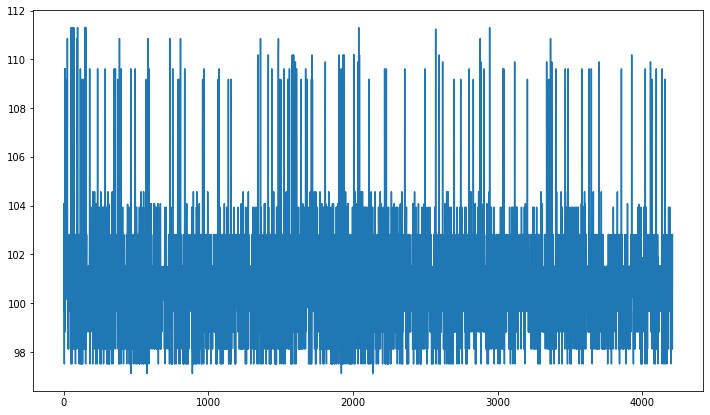

In [41]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,7))
plt.plot(predict)